In [16]:
import requests
import json

# 获取 Binance Launchpool 的 Token
url = "https://pro-api.coingecko.com/api/v3/coins/markets"
params = {
    'vs_currency': 'usd',
    'category': 'binance-launchpool',
    'order': 'market_cap_desc',
    'per_page': 100,
    'page': 1,
}

# 添加 API 密钥
headers = {
    'X-CG-PRO-API-KEY': 'CG-eRSvrpBfBWPTyisA3Tsz6UpQ'
    
}

response = requests.get(url, params=params, headers=headers)

if response.status_code == 200:
    tokens = response.json()
    token_ids = [token['id'] for token in tokens]  # 获取 Token ID 列表
    print("Token IDs:", token_ids)
else:
    print(f"Error fetching tokens: {response.status_code} - {response.text}")

Token IDs: ['sui', 'ethena', 'beam-2', 'notcoin', 'ether-fi', 'io', 'memecoin-2', 'aevo-exchange', 'manta-network', 'altlayer', 'project-galaxy', 'renzo', 'xai-blockchain', 'saga-2', 'venus', 'scroll', 'cyberconnect', 'neutron-3', 'my-neighbor-alice', 'dodo', 'hashflow', 'certik', 'omni-network', 'mines-of-dalarnia', 'maverick-protocol', 'benqi', 'endurance', 'xion-2', 'mobox', 'alpha-finance', 'alien-worlds', 'nfprompt-token', 'radiant-capital', 'sleepless-ai', 'litentry', 'automata', 'flamingo-finance', 'reef', 'bella-protocol', 'wing-finance', 'santos-fc-fan-token', 'paris-saint-germain-fan-token', 'og-fan-token', 'kava-lend', 'manchester-city-fan-token', 'as-roma-fan-token', 'juventus-fan-token', 'atletico-madrid', 'unifi-protocol-dao', 'anchor-protocol', 'merit-circle', 'btc-standard-hashrate-token', 'highstreet']


In [ ]:
import os
import requests
import json

# 添加 API 密钥
headers = {
    'X-CG-PRO-API-KEY': 'CG-eRSvrpBfBWPTyisA3Tsz6UpQ'
}

# 创建文件夹
category = 'binance-launchpool'
os.makedirs(category, exist_ok=True)

# 获取 Binance Launchpool 的 Token
url = "https://pro-api.coingecko.com/api/v3/coins/markets"
params = {
    'vs_currency': 'usd',
    'category': 'binance-launchpool',
    'order': 'market_cap_desc',
    'per_page': 100,
    'page': 1,
}

response = requests.get(url, params=params, headers=headers)

if response.status_code == 200:
    tokens = response.json()
    token_ids = [token['id'] for token in tokens]  # 获取 Token ID 列表
    print("Token IDs:", token_ids)

    # 第二步：获取每个 Token 的市场数据并保存为 JSON 文件
    for ticker in token_ids:
        market_chart_url = f"https://pro-api.coingecko.com/api/v3/coins/{ticker}/market_chart"
        market_chart_params = {
            'vs_currency': 'usd',
            'days': 'max',  # 获取所有可用的数据
        }

        market_chart_response = requests.get(market_chart_url, params=market_chart_params, headers=headers)
        if market_chart_response.status_code == 200:
            market_chart_data = market_chart_response.json()  # 获取市场数据
            # 创建文件名并写入 JSON 文件
            output_file = os.path.join(category, f"{ticker}_market_chart.json")
            with open(output_file, 'w') as json_file:
                json.dump(market_chart_data, json_file, indent=4)
            print(f"Data saved to {output_file}")
        else:
            print(f"Error fetching market chart for {ticker}: {market_chart_response.status_code}")
else:
    print(f"Error fetching tokens: {response.status_code} - {response.text}")

                         Token ID                     Token Name  Symbol  \
0                 atletico-madrid      Atletico Madrid Fan Token     atm   
1                            dodo                           DODO    dodo   
2                      highstreet                     Highstreet    high   
3                        litentry                       Litentry     lit   
4                    sleepless-ai                   Sleepless AI      ai   
5                 anchor-protocol                Anchor Protocol     anc   
6                           renzo                          Renzo     rez   
7                    merit-circle                   Merit Circle      mc   
8                    cyberconnect                          CYBER   cyber   
9                    wing-finance                   Wing Finance    wing   
10                          mobox                          Mobox    mbox   
11             unifi-protocol-dao             Unifi Protocol DAO    unfi   
12          

In [2]:
import os
import requests
import json
import pandas as pd

def fetch_and_analyze_market_data(category):
    # 创建文件夹
    os.makedirs(category, exist_ok=True)

    # 添加 API 密钥
    headers = {
        'X-CG-PRO-API-KEY': 'CG-eRSvrpBfBWPTyisA3Tsz6UpQ'
    }

    # 获取 Token
    url = "https://pro-api.coingecko.com/api/v3/coins/markets"
    params = {
        'vs_currency': 'usd',
        'category': category,
        'order': 'market_cap_desc',
        'per_page': 100,
        'page': 1,
    }

    response = requests.get(url, params=params, headers=headers)

    if response.status_code == 200:
        tokens = response.json()
        # 获取 Token ID、名称和符号
        token_info = {token['id']: {'name': token['name'], 'symbol': token['symbol']} for token in tokens}

        # 获取每个 Token 的市场数据并保存为 JSON 文件
        for ticker in token_info.keys():
            market_chart_url = f"https://pro-api.coingecko.com/api/v3/coins/{ticker}/market_chart"
            market_chart_params = {
                'vs_currency': 'usd',
                'days': 'max',  # 获取所有可用的数据
            }

            market_chart_response = requests.get(market_chart_url, params=market_chart_params, headers=headers)
            if market_chart_response.status_code == 200:
                market_chart_data = market_chart_response.json()  # 获取市场数据
                # 创建文件名并写入 JSON 文件
                output_file = os.path.join(category, f"{ticker}_market_chart.json")
                with open(output_file, 'w') as json_file:
                    json.dump(market_chart_data, json_file, indent=4)
            else:
                print(f"Error fetching market chart for {ticker}: {market_chart_response.status_code}")

        # 分析市场数据
        results = []
        for filename in os.listdir(category):
            if filename.endswith('_market_chart.json'):
                file_path = os.path.join(category, filename)
                
                # 读取 JSON 文件
                with open(file_path, 'r') as json_file:
                    data = json.load(json_file)
                
                # 提取价格和交易量数据
                prices = data.get('prices', [])
                volumes = data.get('total_volumes', [])
                
                # 确保有足够的数据进行分析
                if len(prices) >= 31:
                    first_day_price = prices[0][1]  # 1st day closing price
                    second_day_price = prices[1][1]  # 2nd day closing price
                    thirty_first_day_price = prices[30][1]  # 31st day closing price

                    price_change_1_day = (second_day_price / first_day_price - 1) * 100  # 1日变化百分比
                    price_change_30_days = (thirty_first_day_price / first_day_price - 1) * 100  # 30日变化百分比

                    volume_1_day = volumes[0][1]  # 1st day volume
                    volume_31_day = volumes[30][1]  # 31st day volume

                    # 计算交易量变化百分比
                    volume_change_1_day = (volumes[1][1] / volume_1_day - 1) * 100 if volume_1_day else 0
                    volume_change_30_days = (volume_31_day / volume_1_day - 1) * 100 if volume_1_day else 0

                    # 获取 Token 名称、符号和上市日期
                    token_name = filename.split('_')[0]  # 从文件名中提取 Token ID
                    listed_date = pd.to_datetime(prices[0][0], unit='ms').date()  # 获取上市日期
                    token_details = token_info.get(token_name, {"name": "N/A", "symbol": "N/A"})  # 获取 Token 详情

                    results.append({
                        'Token ID': token_name,
                        'Token Name': token_details['name'],  # Token 名称
                        'Symbol': token_details['symbol'],  # Token 符号
                        'Listed Date': listed_date,  # 上市日期
                        '1st Day Price': first_day_price,
                        '2nd Day Price': second_day_price,
                        'Price Change 1 Day (%)': price_change_1_day,
                        '31st Day Price': thirty_first_day_price,
                        'Price Change 30 Days (%)': price_change_30_days,
                        '1st Day Volume': volume_1_day,
                        '2nd Day Volume': volumes[1][1],
                        '31st Day Volume': volume_31_day,
                        'Volume Change 1 Day (%)': volume_change_1_day,
                        'Volume Change 30 Days (%)': volume_change_30_days,
                    })

        # 转换为 DataFrame
        df = pd.DataFrame(results)

        # 保存为 CSV 文件
        csv_file_path = os.path.join(category, f"{category}_market_analysis.csv")
        df.to_csv(csv_file_path, index=False)
        print(f"Data saved to {csv_file_path}")

        return df

    else:
        print(f"Error fetching tokens: {response.status_code} - {response.text}")
        return None

# 使用示例
category_name = 'binance-launchpool'
df_result = fetch_and_analyze_market_data(category_name)
if df_result is not None:
    print(df_result)

Data saved to binance-launchpool/binance-launchpool_market_analysis.csv
                         Token ID                     Token Name  Symbol  \
0                 atletico-madrid      Atletico Madrid Fan Token     atm   
1                            dodo                           DODO    dodo   
2                      highstreet                     Highstreet    high   
3                        litentry                       Litentry     lit   
4                    sleepless-ai                   Sleepless AI      ai   
5                 anchor-protocol                Anchor Protocol     anc   
6                           renzo                          Renzo     rez   
7                    merit-circle                   Merit Circle      mc   
8                    cyberconnect                          CYBER   cyber   
9                    wing-finance                   Wing Finance    wing   
10                          mobox                          Mobox    mbox   
11             u

In [3]:
category_name = 'binance-launchpad'
df_result_pad = fetch_and_analyze_market_data(category_name)
df_result_pad

Data saved to binance-launchpad/binance-launchpad_market_analysis.csv


,Token ID,Token Name,Symbol,Listed Date,1st Day Price,2nd Day Price,Price Change 1 Day (%),31st Day Price,Price Change 30 Days (%),1st Day Volume,2nd Day Volume,31st Day Volume,Volume Change 1 Day (%),Volume Change 30 Days (%)
0,fc-barcelona-fan-token,FC Barcelona Fan Token,bar,2020-06-25,6.261206,6.261206,0.000000,4.055995,-35.220235,3.118770e+05,3.118770e+05,1.483723e+05,0.000000,-52.425998
1,the-sandbox,The Sandbox,sand,2020-08-14,0.080920,0.066403,-17.939351,0.049274,-39.107902,3.841302e+07,1.410560e+08,6.050311e+06,267.208840,-84.249324
2,wink,WINkLink,win,2019-08-02,0.000460,0.000379,-17.458622,0.000311,-32.326768,5.138387e+07,1.309570e+07,1.804227e+07,-74.513989,-64.887296
3,harmony,Harmony,one,2019-06-02,0.023419,0.020503,-12.451716,0.019416,-17.095337,6.470791e+08,1.063956e+08,1.676470e+07,-83.557564,-97.409172
4,perlin,PERL.eco,perl,2019-08-27,0.114880,0.112059,-2.456247,0.036246,-68.448604,6.187399e+07,3.062817e+07,3.645708e+06,-50.499115,-94.107850
5,arkham,Arkham,arkm,2023-07-18,0.646829,0.646829,0.000000,0.379371,-41.349120,1.722796e+08,1.722796e+08,1.671736e+07,0.000000,-90.296375
6,hooked-protocol,Hooked Protocol,hook,2022-12-01,2.556925,2.556925,0.000000,1.172679,-54.137143,4.221624e+08,4.221624e+08,1.419313e+07,0.000000,-96.637992
7,space-id,SPACE ID,id,2023-03-22,0.441206,0.441206,0.000000,0.741965,68.167560,3.646311e+08,3.646311e+08,2.262229e+08,0.000000,-37.958421
8,matic-network,Polygon,matic,2019-04-27,0.005470,0.005207,-4.815457,0.024397,345.986025,4.315835e+07,9.750768e+06,9.517826e+07,-77.406994,120.532678
9,axie-infinity,Axie Infinity,axs,2020-11-04,0.145700,0.145700,0.000000,0.512046,251.439406,1.885524e+07,1.885524e+07,8.957752e+06,0.000000,-52.491964


In [6]:
import pandas as pd

# 假设 df_result 和 df_result_pad 已经定义并包含数据

# 创建新的列并根据类别设置值
df_result['launchpool'] = 1  # 假设 df_result 属于 launchpool 类别
df_result_pad['launchpad'] = 1  # 假设 df_result_pad 属于 launchpad 类别

# 将 launchpool 和 launchpad 列的其他值设为 0
df_result['launchpad'] = 0
df_result_pad['launchpool'] = 0

# 合并两个 DataFrame
combined_df = pd.concat([df_result, df_result_pad], ignore_index=True)

# 打印合并后的 DataFrame
combined_df


,Token ID,Token Name,Symbol,Listed Date,1st Day Price,2nd Day Price,Price Change 1 Day (%),31st Day Price,Price Change 30 Days (%),1st Day Volume,2nd Day Volume,31st Day Volume,Volume Change 1 Day (%),Volume Change 30 Days (%),launchpool,launchpad
0,atletico-madrid,Atletico Madrid Fan Token,atm,2020-06-22,4.857225,4.857225,0.000000,4.099940,-15.590910,1.825588e+05,1.825588e+05,1.315138e+05,0.000000,-27.960878,1,0
1,dodo,DODO,dodo,2020-09-30,0.534423,0.534423,0.000000,0.274288,-48.675763,1.528916e+04,1.528916e+04,2.022832e+05,0.000000,1223.049701,1,0
2,highstreet,Highstreet,high,2021-10-15,5.684114,5.684114,0.000000,27.342455,381.032828,6.918914e+06,6.918914e+06,1.467958e+06,0.000000,-78.783403,1,0
3,litentry,Litentry,lit,2021-02-04,3.040340,3.040340,0.000000,7.683997,152.734823,3.123347e+08,3.123347e+08,3.134278e+07,0.000000,-89.965002,1,0
4,sleepless-ai,Sleepless AI,ai,2024-01-04,1.228162,1.228162,0.000000,1.172293,-4.548998,4.634937e+08,4.634937e+08,4.230632e+07,0.000000,-90.872297,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,beta-finance,Beta Finance,beta,2021-10-08,3.201185,3.201185,0.000000,1.745600,-45.470188,1.774617e+09,1.774617e+09,1.890188e+07,0.000000,-98.934875,0,1
86,bittorrent,BitTorrent,btt,2022-01-21,0.000002,0.000002,0.000000,0.000002,-6.924945,1.415334e+06,1.415334e+06,1.088053e+08,0.000000,7587.609509,0,1
87,band-protocol,Band Protocol,band,2019-09-19,0.637565,0.601250,-5.695933,0.364485,-42.831824,2.172191e+07,7.339749e+06,1.462574e+06,-66.210387,-93.266827,0,1
88,cartesi,Cartesi,ctsi,2020-04-24,0.056747,0.052221,-7.975836,0.032734,-42.315751,9.182619e+07,1.868364e+07,3.818194e+06,-79.653259,-95.841933,0,1


In [10]:
import pandas as pd

# 假设 combined_df 已经定义并包含所需的列

# 计算 Launchpool 类别的平均值
launchpool_avg = combined_df[combined_df['launchpool'] == 1][['Price Change 1 Day (%)', 'Price Change 30 Days (%)', 'Volume Change 1 Day (%)', 'Volume Change 30 Days (%)']].mean()

# 计算 Launchpad 类别的平均值
launchpad_avg = combined_df[combined_df['launchpad'] == 1][['Price Change 1 Day (%)', 'Price Change 30 Days (%)', 'Volume Change 1 Day (%)', 'Volume Change 30 Days (%)']].mean()

# 输出结果
print("Launchpool - Average Price Change (%):")
print(launchpool_avg[['Price Change 1 Day (%)', 'Price Change 30 Days (%)']])

print("\nLaunchpad - Average Price Change (%):")
print(launchpad_avg[['Price Change 1 Day (%)', 'Price Change 30 Days (%)']])

print("\nLaunchpool - Average Volume Change (%):")
print(launchpool_avg[['Volume Change 1 Day (%)', 'Volume Change 30 Days (%)']])

print("\nLaunchpad - Average Volume Change (%):")
print(launchpad_avg[['Volume Change 1 Day (%)', 'Volume Change 30 Days (%)']])

Launchpool - Average Price Change (%):
Price Change 1 Day (%)     -0.524814
Price Change 30 Days (%)    7.158864
dtype: float64

Launchpad - Average Price Change (%):
Price Change 1 Day (%)      -0.077596
Price Change 30 Days (%)    57.434786
dtype: float64

Launchpool - Average Volume Change (%):
Volume Change 1 Day (%)        16.297969
Volume Change 30 Days (%)    1759.166184
dtype: float64

Launchpad - Average Volume Change (%):
Volume Change 1 Day (%)       -5.011360
Volume Change 30 Days (%)    185.654702
dtype: float64


In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# 假设 combined_df 已经定义并包含所需的列

# 计算 Launchpool 的 30 天平均值
launchpool_avg_30d = combined_df[combined_df['launchpool'] == 1][[
    'Price Change 30 Days (%)', 
    'Volume Change 30 Days (%)'
]].mean().reset_index()
launchpool_avg_30d['Category'] = 'Launchpool'

# 计算 Launchpad 的 30 天平均值
launchpad_avg_30d = combined_df[combined_df['launchpad'] == 1][[
    'Price Change 30 Days (%)', 
    'Volume Change 30 Days (%)'
]].mean().reset_index()
launchpad_avg_30d['Category'] = 'Launchpad'

# 合并两个 DataFrame
combined_avg_30d = pd.concat([launchpool_avg_30d, launchpad_avg_30d]).reset_index(drop=True)

# 打印结果
print(combined_avg_30d)

                       index            0    Category
0   Price Change 30 Days (%)     7.158864  Launchpool
1  Volume Change 30 Days (%)  1759.166184  Launchpool
2   Price Change 30 Days (%)    57.434786   Launchpad
3  Volume Change 30 Days (%)   185.654702   Launchpad


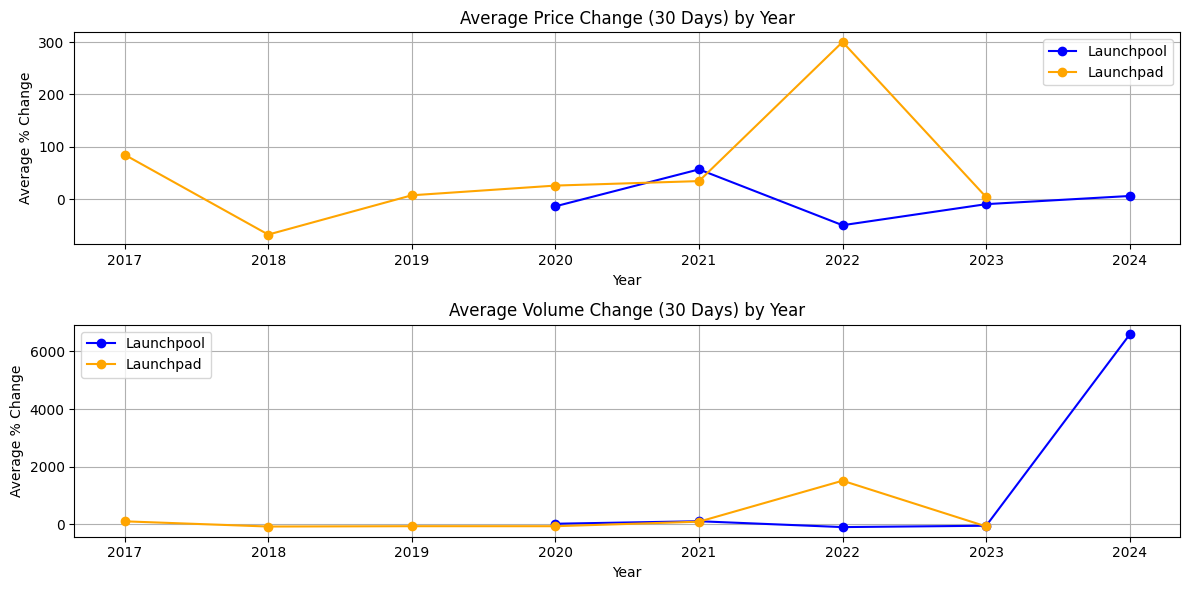

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# 假设 combined_df 已经定义并包含所需的列，并且 'Listed Date' 列存在

# 确保 'Listed Date' 列为 datetime 类型
combined_df['Listed Date'] = pd.to_datetime(combined_df['Listed Date'])

# 提取年份
combined_df['Year'] = combined_df['Listed Date'].dt.year

# 计算每年的平均值
launchpool_trend = combined_df[combined_df['launchpool'] == 1].groupby('Year')[['Price Change 30 Days (%)', 'Volume Change 30 Days (%)']].mean().reset_index()
launchpad_trend = combined_df[combined_df['launchpad'] == 1].groupby('Year')[['Price Change 30 Days (%)', 'Volume Change 30 Days (%)']].mean().reset_index()

# 绘制趋势图
plt.figure(figsize=(12, 6))

# 绘制价格变化趋势
plt.subplot(2, 1, 1)
plt.plot(launchpool_trend['Year'], launchpool_trend['Price Change 30 Days (%)'], marker='o', label='Launchpool', color='blue')
plt.plot(launchpad_trend['Year'], launchpad_trend['Price Change 30 Days (%)'], marker='o', label='Launchpad', color='orange')
plt.title('Average Price Change (30 Days) by Year')
plt.xlabel('Year')
plt.ylabel('Average % Change')
plt.legend()
plt.grid()

# 绘制交易量变化趋势
plt.subplot(2, 1, 2)
plt.plot(launchpool_trend['Year'], launchpool_trend['Volume Change 30 Days (%)'], marker='o', label='Launchpool', color='blue')
plt.plot(launchpad_trend['Year'], launchpad_trend['Volume Change 30 Days (%)'], marker='o', label='Launchpad', color='orange')
plt.title('Average Volume Change (30 Days) by Year')
plt.xlabel('Year')
plt.ylabel('Average % Change')
plt.legend()
plt.grid()

plt.tight_layout()  # 调整子图参数
plt.show()